# What is NLP (Natural Language Processing)?
NLP is a very board field, anything that processes natural language is a part of it.

Here are some examples:
1. Translation between languages: https://translate.google.com/
2. Answering questions about an image: http://vqa.cloudcv.org/
3. Checking Grammar of a given passage: https://www.grammarly.com/grammar-check

## Rule-based NLP
In the early days of NLP, the processing was done by a set of predefined rules. 

For example, a rule-based grammar checker may have a rule that states "is" which follows a "you" is wrong and should be changed to "are".  

"You is a student." $\to$ "You are a student"

For these systems, thousands or more rules have to be manually defined.

## Statistical NLP
As the name implies statistical NLP uses statistics to process natural language. 

One of the most well-known successes of statistical NLP is the statistical machine translation with the IBM alignment models. The phrase-based version of these models are what Google Translation was based on before moving on to neural methods.

For the next lesson, we will focus on the n-gram language model of statistical NLP. As the common Neural NLP uses a similar probability approach as the model.

## Machine learning

In machine learning, rather than manually design a model, we create a model that can learn from a set of data.

For example, if we want of computer to identify handwriting, we will need a large number of images of handwriting. These images are used to train a model. After training, we will have a model that takes in an image of handwriting and outputs what it identifies. 

Statistical NLP is a form of machine learning.

### Example: regression

Say we have a set of data points.

**Note: You don't need to understand the code in this section. This is for demonstration only.**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
# Generate data points
X = np.linspace(-10, 10, 10)
X = np.random.normal(X, 0.2)  # Add noise to data
Y = X ** 2
Y = np.random.normal(Y, 10)  # Add noise to data

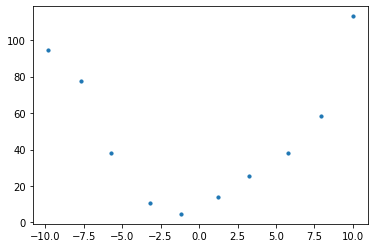

In [3]:
plt.scatter(X, Y, s=10)
plt.show()

Now, we want to find a function that models the underlying relationship between input and output.

Say the underlying relationship is the following red line:

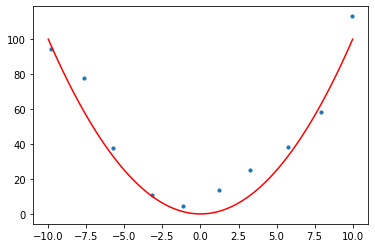

In [4]:
x = np.linspace(-10, 10, 100)

y = x ** 2

plt.scatter(X, Y, s=10)
plt.plot(x, y, 'r')
plt.show()

Real-life data often have noises which is why the data points are not necessary on the red line.

One class of machine learning algorithm called regression or curve fitting can produce a function given a set of data.

We can use it to find the underlying relationship.

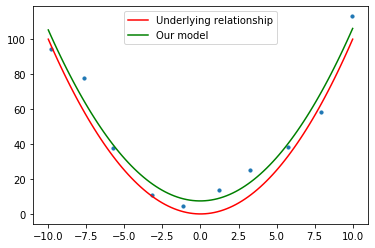

In [5]:
X_2 = PolynomialFeatures(degree=2).fit_transform(X.reshape(-1, 1))
x_2 = PolynomialFeatures(degree=2).fit_transform(x.reshape(-1, 1))

reg_2 = LinearRegression().fit(X_2, Y.reshape(-1, 1))
y_2 = reg_2.predict(x_2)

plt.scatter(X, Y, s=10)
plt.plot(x, y, 'r', label='Underlying relationship')
plt.plot(x, y_2, 'g', label='Our model')
plt.legend()
plt.show()

We can see the model actual matches the real underlying relationship pretty well in this case.

Note that the prediction from the regression model doesn't necessary match the data point.

This is a good thing as the data points can have noises.

### Overfitting

If we do force the model to go through the data points, then it is modeling the noise rather than the underlying relationship.

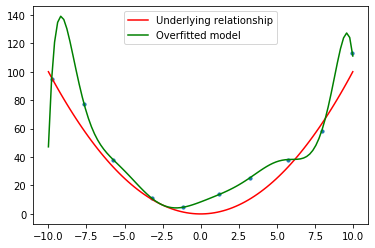

In [6]:
X_10 = PolynomialFeatures(degree=10).fit_transform(X.reshape(-1, 1))
x_10 = PolynomialFeatures(degree=10).fit_transform(x.reshape(-1, 1))

reg_10 = LinearRegression().fit(X_10, Y.reshape(-1, 1))
y_10 = reg_10.predict(x_10)

plt.scatter(X, Y, s=10)
plt.plot(x, y, 'r', label='Underlying relationship')
plt.plot(x, y_10, 'g', label="Overfitted model")
plt.legend()
plt.show()

This is undesired as the noises are random in nature. So the noise in one set of data is usually different than another set.

Let us set up a way to measure the performance.

To measure the two models we have trained, we will use a metric called mean square error. We will talk about it in detail in a later lesson. 

For now, think it as the distance between to set of data. In our case, the real data and predicted data from our model.

If we test on the three center point of our data points:

In [7]:
Y_2 = reg_2.predict(X_2)

mean_squared_error(Y[3:6], Y_2.reshape(-1)[3:6])

26.463736327032947

In [8]:
Y_10 = reg_10.predict(X_10)

mean_squared_error(Y[3:6], Y_10.reshape(-1)[3:6])

1.5774665631853171e-13

The first result is the original model, the second result is the overfitted model.

The overfitted model should have a lower distance between the data points and prediction as the overfitted model go through the data points.

However, the overfitted model probability would not model a different set of data points from the same underlying model.

To make the testing more fair, we should generate a new set of data points from the same underlying model.

In [9]:
# Generate new data points
x_t = np.linspace(-10, 10, 10)
X_t = np.random.normal(x_t, 0.2)  # Add noise to data
Y_t = X_t ** 2
Y_t = np.random.normal(Y_t, 10)  # Add noise to data

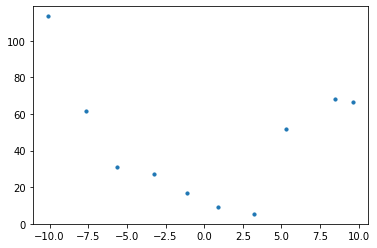

In [10]:
plt.scatter(X_t, Y_t, s=10)
plt.show()

Now make prediction with models and measure them

In [11]:
X_2_t = PolynomialFeatures(degree=2).fit_transform(X_t.reshape(-1, 1))
Y_2_t = reg_2.predict(X_2_t)

mean_squared_error(Y_t, Y_2_t)

179.74767661656546

In [12]:
X_10_t = PolynomialFeatures(degree=10).fit_transform(X_t.reshape(-1, 1))
Y_10_t = reg_10.predict(X_10_t)

mean_squared_error(Y_t, Y_10_t)

1316.0508028945383

The original model should perform better than the overfitted model.

### Training data and test data

In practice, given a dataset, we split into training data and test data. Only the training data is used for training. The test data is not used for training at all. Else the test would not be accurate.

## Preprocessing of the data

In machine learning, it is important to process the dataset prior to training.

First import the packages and load in the data:

In [13]:
from sklearn.datasets import fetch_20newsgroups

dataset = fetch_20newsgroups(data_home="data", remove=('headers', 'footers', 'quotes'))

This dataset contains newsgroup posts. Here is one example:

In [14]:
print(dataset.data[3])


Do you have Weitek's address/phone number?  I'd like to get some information
about this chip.



### spaCy
This a python package for preprocessing of text. It is optimized and aimed for deep learning. 

### Tokenization

In NLP, it is common to convert a sentence to an array of words.

For English, we just need to cut along the space and punctuation for the most part. This is called tokenization.

In [15]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
eng = English()
tokenizer = Tokenizer(eng.vocab)

In [16]:
list(tokenizer(dataset.data[3]))

[,
 Do,
 you,
 have,
 Weitek's,
 address/phone,
 number?,
  ,
 I'd,
 like,
 to,
 get,
 some,
 information,
 ,
 about,
 this,
 chip.,
 ]

The sentence became a list of words.

### Lemmatization
In certain cases, it may be helpful to convert the words into their root forms. 

Examples: "apples" $\to$ "apple", "bought" $\to$ "buy"

In [17]:
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES

lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)

In [18]:
lemmatizer("apples", "NOUN")

['apple']

In [19]:
lemmatizer("bought", "VERB")

['buy']

This can help with the model to deal with variation in the data.

As NLP moves toward deep learning, lemmatization becomes increasingly uncommon. After all, lemmatization removes some information in the process, and deep learning deals with variation better than traditional statistical approaches. 

### Stop Word

Sometimes it is also helpful to remove high-frequency words. These high-frequency words are called stop words. There is no standard list of stop words.

In [20]:
from spacy.lang.en.stop_words import STOP_WORDS
print(list(STOP_WORDS)[:10])

['did', 'those', 'hereafter', 'his', 'herself', 'still', 'can', 'wherein', 'many', 'per']


Just like lemmatization, it tends to be unnecessary to remove stop words for deep learning.

### Preprocess with spaCy
Instead of processing it step by step like in the preprocess section. SpaCy offers a pipeline approach to preprocessing data. 

Many functions in spaCy requires a statistic model that must be downloaded first. Different language requires different models. These models can be downloaded [here](https://spacy.io/models).

We will be needing a model for English, which will be downloaded by the following code:

In [21]:
import spacy

spacy.cli.download("en_core_web_sm")


    Linking successful
    /home/user/anaconda3/envs/nlp-course/lib/python3.7/site-packages/en_core_web_sm
    -->
    /home/user/anaconda3/envs/nlp-course/lib/python3.7/site-packages/spacy/data/en_core_web_sm

    You can now load the model via spacy.load('en_core_web_sm')



In [22]:
nlp = spacy.load("en_core_web_sm", disable=['tagger', 'parser', 'ner'])
sentencizer = nlp.create_pipe("sentencizer")
nlp.add_pipe(sentencizer, first=True)

The model provided by spaCy comes with many components in the pipeline by default which we disabled during loading.
A sentencizer is added as it is not a part of the default pipeline. Lemmatization is included by default.

In [23]:
for doc in nlp.pipe(dataset.data):
    for sent in doc.sents:
        for token in sent:
            # Do NLP stuff
            
            # Example: print out each word and the lemma of each word.
            print(f"{token} -> {token.lemma_}")
            
        # Remove the two break statements to process the whole document.
        break  
    break

I -> I
was -> be
wondering -> wonder
if -> if
anyone -> anyone
out -> out
there -> there
could -> can
enlighten -> enlighten
me -> me
on -> on
this -> this
car -> car
I -> I
saw -> see

 -> 

the -> the
other -> other
day -> day
. -> .


The output is a single sentence before and after lemmatization. Remove the break statements to process the whole dataset.